Bike sharing polynomial features
---

Exercise - Load and split the data, set the baseline
---

> **Exercise**: Load the data set. Encode categorical variables with one-hot encoding. Split the data into train/test sets with the `train_test_split()` function from Scikit-learn (50-50 split, `random_state=0`). Fit a linear regression and compare its performance to the median baseline using the mean absolute error (MAE) measure.

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import os

In [3]:
# Load data
data_df = pd.read_csv(os.path.join('data','bike-sharing.csv'))
data_df.head()


,temp,hum,windspeed,yr,workingday,holiday,weekday,season,weathersit,casual
0,0.344,0.806,0.160,2011,no,no,6,spring,cloudy,331
1,0.363,0.696,0.249,2011,no,no,0,spring,cloudy,131
2,0.196,0.437,0.248,2011,yes,no,1,spring,clear,120
3,0.200,0.590,0.160,2011,yes,no,2,spring,clear,108
4,0.227,0.437,0.187,2011,yes,no,3,spring,clear,82


In [4]:
# Encode categorical variables
encoded_df = pd.get_dummies(data_df, columns=['yr','workingday','holiday','season','weathersit','weekday'])
encoded_df.head(5)

,temp,hum,windspeed,casual,yr_2011,yr_2012,workingday_no,workingday_yes,holiday_no,holiday_yes,...,weathersit_clear,weathersit_cloudy,weathersit_rainy,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0.344,0.806,0.160,331,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0.363,0.696,0.249,131,1,0,1,0,1,0,...,0,1,0,1,0,0,0,0,0,0
2,0.196,0.437,0.248,120,1,0,0,1,1,0,...,1,0,0,0,1,0,0,0,0,0
3,0.200,0.590,0.160,108,1,0,0,1,1,0,...,1,0,0,0,0,1,0,0,0,0
4,0.227,0.437,0.187,82,1,0,0,1,1,0,...,1,0,0,0,0,0,1,0,0,0


In [5]:
# Split into train/test sets
# use np.train_test_split function
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(encoded_df, test_size=0.5, random_state=0)

print('Train DataFrame:', train_df.shape)
print('Test DataFrame:', test_df.shape)

Train DataFrame: (365, 24)
Test DataFrame: (366, 24)


In [9]:
# Create variables

X_tr = train_df.drop('casual',axis=1).values
y_tr = train_df.casual.values

X_te = test_df.drop('casual',axis=1).values
y_te = test_df.casual.values

In [6]:
import numpy as np

# Mean absolute error (MAE)
def MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))

def RMSE(y, y_pred):
    return(np.sqrt(np.mean(np.square(y-y_pred))))

In [15]:
# Linear regression
from sklearn.linear_model import LinearRegression

def fitModel(X_train, y_train, X_test):
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    return np.maximum(lr.predict(X_te),50)




In [16]:
# Median baseline
mae_baseline = MAE(y_te,np.median(y_te))
mae_lr = MAE(y_te,fitModel(X_tr, y_tr, X_te))
print('MAE baseline: {:.3f}'.format(mae_baseline))
print('MAE linear regression: {:.3f}'.format(mae_lr))


rmse_baseline = RMSE(y_te,y_te.mean())
rmse_lr = RMSE(y_te,fitModel(X_tr, y_tr, X_te))
print("R2 score:",1-(rmse_lr/rmse_baseline))

MAE baseline: 502.634
MAE linear regression: 246.866
R2 score: 0.4862103702689541


Exercise - Add polynomial features
---

> **Exercise**: Add the `temp^2` and `temp^3` polynomial features. Then fit and evaluate a linear regression. Plot your model with a scatter plot of temperatures vs. number of users. Feel free to add other features.

In [22]:
# Add polynomial features

from sklearn.preprocessing import PolynomialFeatures

# Build the polynomial feature
pf_obj = PolynomialFeatures(degree=3, include_bias = False)

# Create the polynomial features

temperature = encoded_df['temp'].values
X = encoded_df.drop('casual',axis=1).values
y = encoded_df.casual.values
X2 = pf_obj.fit_transform(temperature[:,np.newaxis])
X_poly = np.concatenate((X, X2), axis=1)

print('Shape:', X_poly.shape)


# Fit a linear regression
X_tr, X_te, y_tr, y_te = train_test_split(X_poly, y, test_size=0.5, random_state=0)

lr = LinearRegression()
lr.fit(X_tr,y_tr)

mae_lr2 = MAE(y_te,np.maximum(lr.predict(X_te),50))

print('MAE lr with new features: {:.3f}'.format(mae_lr2))





Shape: (731, 26)
MAE lr with new features: 224.506


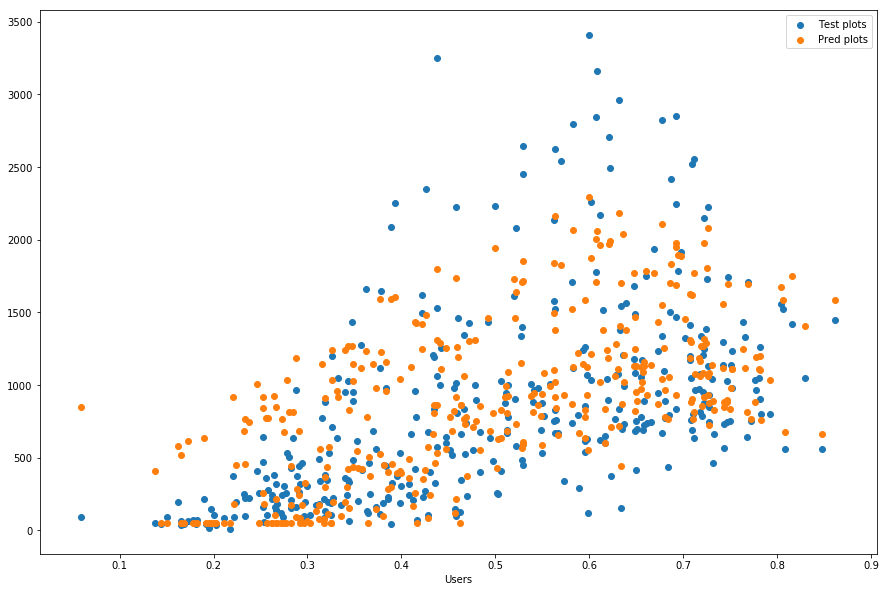

In [24]:
# Plot predictions
import matplotlib.pyplot as plt
%matplotlib inline



plt.figure(figsize=(15,10))

# Temperature is the first column of our feature matrix
x= X_te[:,0]

plt.scatter(x, y_te, label = 'Test plots')
plt.scatter(x, np.maximum(lr.predict(X_te),50), label = 'Pred plots')

plt.xlabel("Temperature")
plt.xlabel("Users")


plt.legend()
plt.show()

Exercise - Separate sources
---

In the last exercise, we saw that we can identify two sources in the data.

1. Data points collected during working days
1. Data points collected during non-working days

The goal of this exercise is to create a model for each source using your extended set of features, e.g., the original features plus the `temp^2`, `temp^3` polynomial features.

> **Exercise**: Create a model for each source with the extended set of features, and evaluate the overall performance on the test set using MAE. Plot the two models with a scatter plot of temperatures vs. number of users. Create a final comparison using a bar chart.

In [ ]:
# Separate data points
???

In [ ]:
# Fit a linear regression for working days (wd)
# and one for non-working days (nwd)
???

# Compute overall performance with MAE
mae_wdnwd = ???
print('MAE two sources: {:.3f}'.format(mae_wdnwd))

In [ ]:
# Plot predictions
???

In [ ]:
# Final comparison
???